In [1]:
import pandas as pd
dataset=pd.read_csv("PlacedOrNot.csv")
dataset.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender,Stream
0,22.0,1.0,8.0,1.0,1.0,1.0,Male,Electronics And Communication
1,21.0,0.0,7.0,1.0,1.0,1.0,Female,Computer Science
2,22.0,1.0,6.0,0.0,0.0,1.0,Female,Information Technology
3,21.0,0.0,8.0,0.0,1.0,1.0,Male,Information Technology
4,22.0,0.0,8.0,1.0,0.0,1.0,Male,Mechanical


# Covariance

In [2]:
dataset.cov()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.755449,0.006426,-0.153592,0.001788,-0.022236,0.030931
Internships,0.006426,0.547892,0.016831,0.001516,-0.004410,0.066014
CGPA,-0.153592,0.016831,0.936536,0.006434,0.000982,0.283299
Hostel,0.001788,0.001516,0.006434,0.196728,0.018092,-0.008422
HistoryOfBacklogs,-0.022236,-0.004410,0.000982,0.018092,0.155298,-0.004378
PlacedOrNot,0.030931,0.066014,0.283299,-0.008422,-0.004378,0.247317


# Correlation

In [3]:
dataset.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [5]:
dataset.corrwith(dataset["Hostel"])

Age                  0.003042
Internships          0.004617
CGPA                 0.014991
Hostel               1.000000
HistoryOfBacklogs    0.103506
PlacedOrNot         -0.038182
dtype: float64

# Preprocessing

In [6]:
dataset=dataset.drop(columns='Age')
dataset=dataset.dropna()

# Visulaize the pair

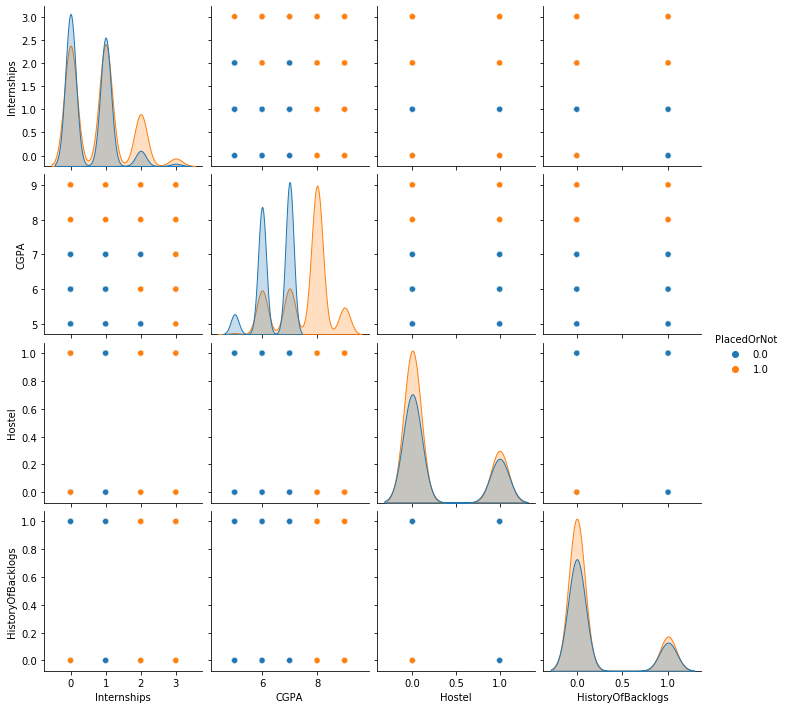

In [7]:
import seaborn as sns
sns.pairplot(dataset,hue="PlacedOrNot")

import matplotlib.pyplot as plt
plt.savefig('pairplot_ssc_b.png')

# Calling user defined function Descriptive file

In [8]:
from Descriptive import Descriptive

obj=Descriptive()

# Sregrating quantitative Data and qualtative

In [9]:
quan,qual=obj.segreQuanQual(dataset)

The Quantitative Data: ['Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']
The Qualtitative Data ['Gender', 'Stream']


In [10]:
quan_data=dataset[quan]

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [12]:
calc_vif(quan_data)

,variables,VIF
0,Internships,1.917384
1,CGPA,3.985125
2,Hostel,1.387094
3,HistoryOfBacklogs,1.250114
4,PlacedOrNot,2.730179


In [13]:
quan_data=dataset[['HistoryOfBacklogs','PlacedOrNot',]]

# Univarite Analysis

## Probability Density Function(PDF)

C:\anaconda3\envs\AIML\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis

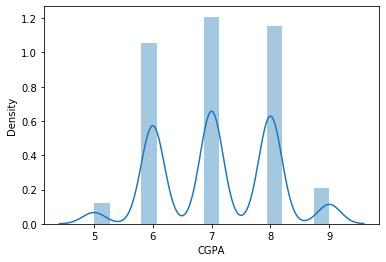

In [15]:
# Density Polt

import seaborn as sns
x=dataset['CGPA']
ax = sns.distplot(dataset['CGPA'],kde=True)

In [16]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=7.074, Standard Deviation=0.968
The area between range(0,10):0.9956248578076445


C:\anaconda3\envs\AIML\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis

0.9956248578076445

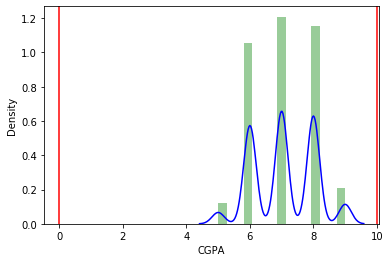

In [18]:
get_pdf_probability(dataset['CGPA'],0,10)

# cumulative Density function

(array([0.03236682, 0.03236682, 0.03236682, 0.03236682, 0.03236682,
        0.03236682, 0.03236682, 0.03236682, 0.03236682, 0.03236682,
        0.03236682, 0.03236682, 0.03236682, 0.03236682, 0.03236682,
        0.03236682, 0.03236682, 0.03236682, 0.03236682, 0.03236682,
        0.03236682, 0.03236682, 0.03236682, 0.03236682, 0.03236682,
        0.31355361, 0.31355361, 0.31355361, 0.31355361, 0.31355361,
        0.31355361, 0.31355361, 0.31355361, 0.31355361, 0.31355361,
        0.31355361, 0.31355361, 0.31355361, 0.31355361, 0.31355361,
        0.31355361, 0.31355361, 0.31355361, 0.31355361, 0.31355361,
        0.31355361, 0.31355361, 0.31355361, 0.31355361, 0.31355361,
        0.63587323, 0.63587323, 0.63587323, 0.63587323, 0.63587323,
        0.63587323, 0.63587323, 0.63587323, 0.63587323, 0.63587323,
        0.63587323, 0.63587323, 0.63587323, 0.63587323, 0.63587323,
        0.63587323, 0.63587323, 0.63587323, 0.63587323, 0.63587323,
        0.63587323, 0.63587323, 0.63587323, 0.63

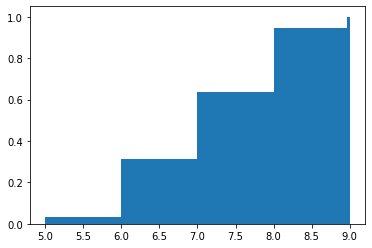

In [19]:
import matplotlib.pyplot as plt
x=dataset['CGPA']
plt.hist(x,cumulative=True, density=True,bins=100)

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['CGPA'])
ecdf(65)

1.0

# Types of Test

# Z- Score: Normal distribution to Standard Normal Distribution

C:\anaconda3\envs\AIML\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

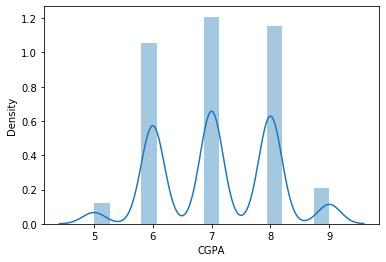

In [21]:
# Normal Distribution
import seaborn as sns
sns.distplot(dataset['CGPA'],kde=True)

C:\anaconda3\envs\AIML\lib\site-packages\ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we load stuff.
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\anaconda3\envs\AIML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy arr

-4.216302140720756e-16

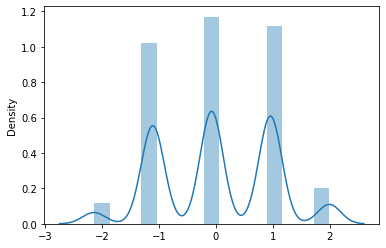

In [22]:
# Coverted to standard Normal Distribution
import seaborn as sns
mean=dataset['CGPA'].mean()
std=dataset['CGPA'].std()

values=[i for i in dataset['CGPA']]

z_score=[((j-mean)/std) for j in values]

sns.distplot(z_score,kde=True)

sum(z_score)/len(z_score)
#z_score.std()


In [23]:
dataset

,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender,Stream
0,1.0,8.0,1.0,1.0,1.0,Male,Electronics And Communication
1,0.0,7.0,1.0,1.0,1.0,Female,Computer Science
2,1.0,6.0,0.0,0.0,1.0,Female,Information Technology
3,0.0,8.0,0.0,1.0,1.0,Male,Information Technology
4,0.0,8.0,1.0,0.0,1.0,Male,Mechanical
...,...,...,...,...,...,...,...
2961,0.0,7.0,0.0,0.0,0.0,Male,Information Technology
2962,1.0,7.0,1.0,0.0,0.0,Male,Mechanical
2963,1.0,7.0,0.0,0.0,0.0,Male,Information Technology
2964,1.0,7.0,0.0,0.0,0.0,Male,Computer Science


In [25]:
dataset[dataset["Gender"]=="M"]["CGPA"]

Series([], Name: CGPA, dtype: float64)

# T-Test

#### Independant Sample
Diferrent Group(Male, Female) but same contion(salary)

In [27]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['Gender']=='M']['CGPA']
female = dataset[dataset['Gender']=='F']['CGPA']
#print(male)
ttest_ind(male,female)

Ttest_indResult(statistic=nan, pvalue=nan)

#### Dependant Sample
Same Group(Male) but Different Condition(ssc_p,hsc_p)


In [ ]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)


### for one sample mean

should same for different sample

scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')

# ANAVO : Analysis of Variance

## One-Way Classification

In [ ]:
import scipy.stats as stats

stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('degree_p ~ C(ssc_p) + C(hsc_p) + C(ssc_p):C(hsc_p)', data=dataset).fit()
sm.stats.anova_lm(model, typ=2)